In [2]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [7]:
X = np.array([[1, 1, 1],  [0, 1, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1]])

In [8]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 0.96190511  0.31687952]
 [-0.2388848  -0.72996899]
 [-0.89020966 -0.01070984]
 [-0.26082074  0.66628558]
 [ 0.4280101  -0.24248627]]


### Another method of applying MDS is by constructing a distance matrix and applying MDS directly to this matrix as shown in the code below

In [9]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

In [10]:
X_transform_L1

array([[ 1.51852459,  0.20521979],
       [-0.27676843, -0.86957521],
       [-1.29352729, -0.12570077],
       [-0.43805109,  0.78612157],
       [ 0.48982223,  0.00393462]])

### An original point and its corresponding embedded point are both shown in the same color:

Text(0.5, 0.92, 'Original Points')

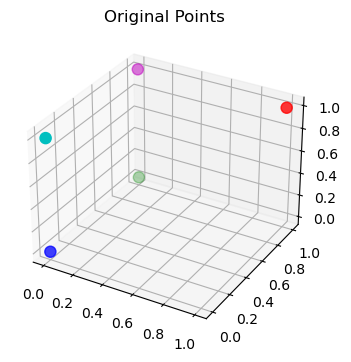

In [11]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

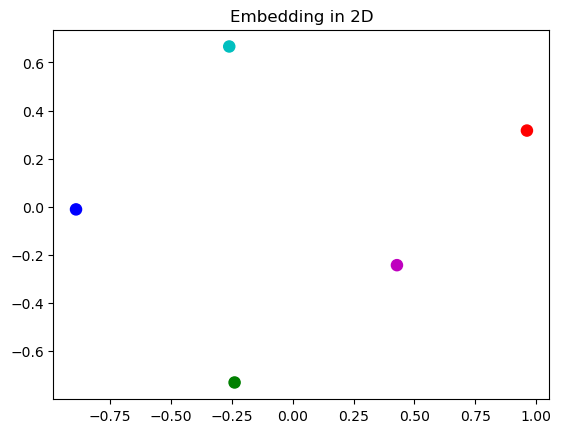

In [12]:
ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

### Practical Multidimensional Scaling On Olivetti Faces Dataset From AT&T

In [38]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1], hue=y, palette=['r', 'g', 'b', 'c'])
    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])

 # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
        plt.title(title)
        plt.show()

In [40]:
import sklearn.datasets as dt
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]

### Using the Euclidean Pairwise Distances

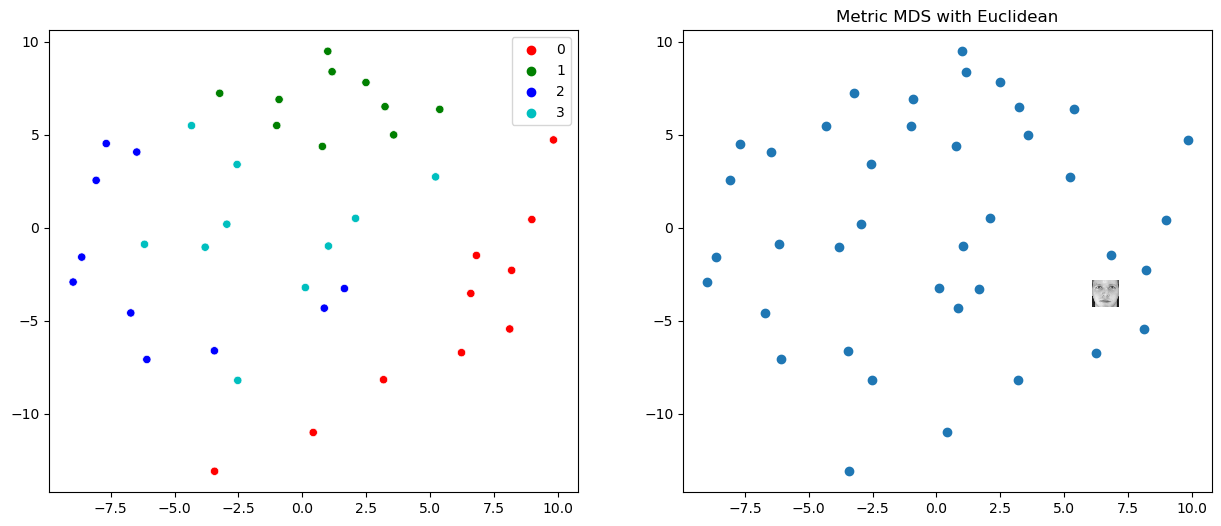

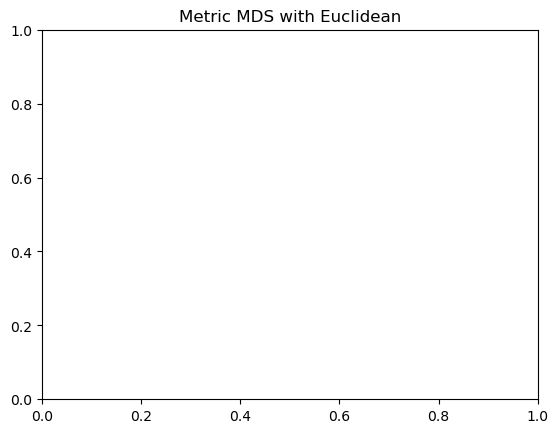

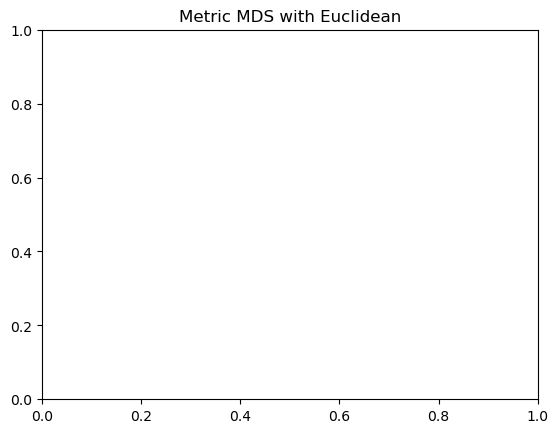

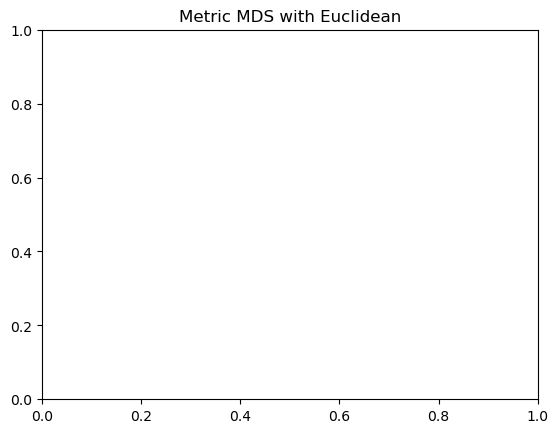

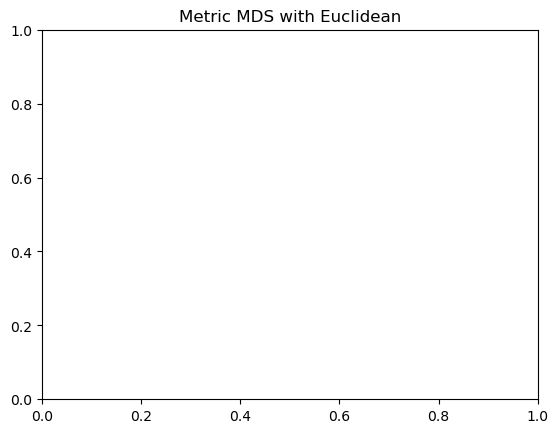

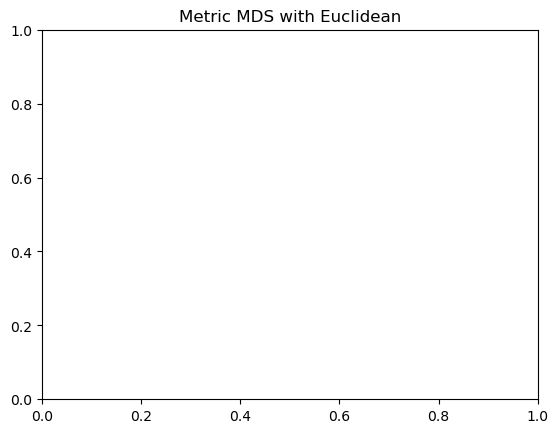

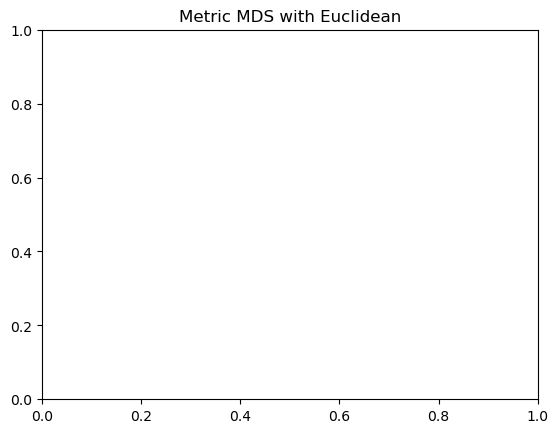

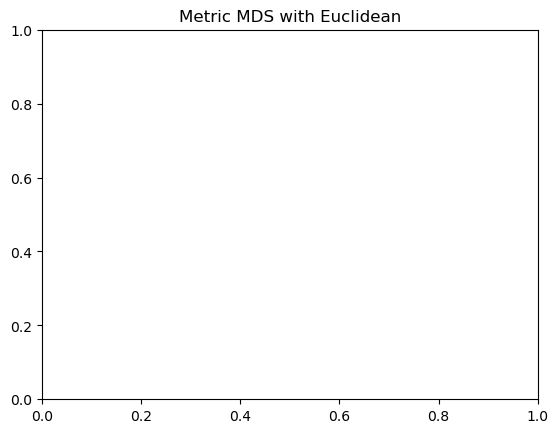

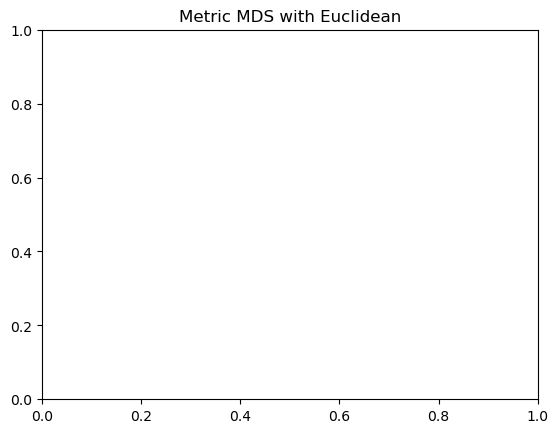

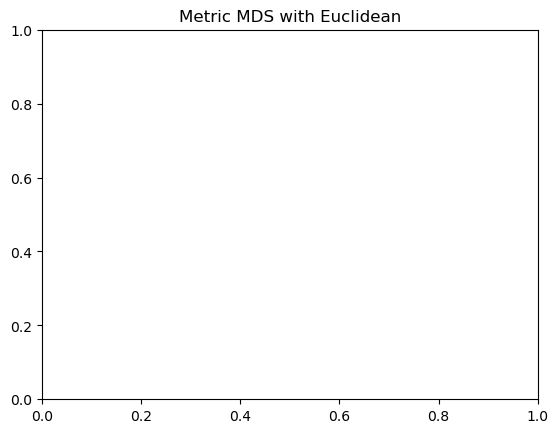

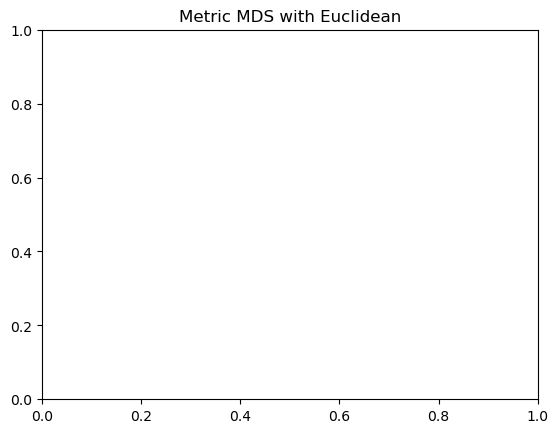

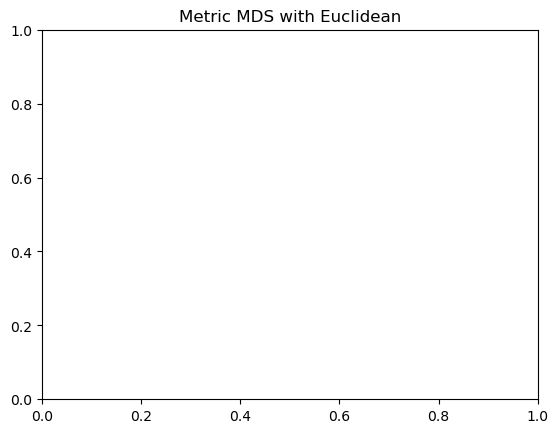

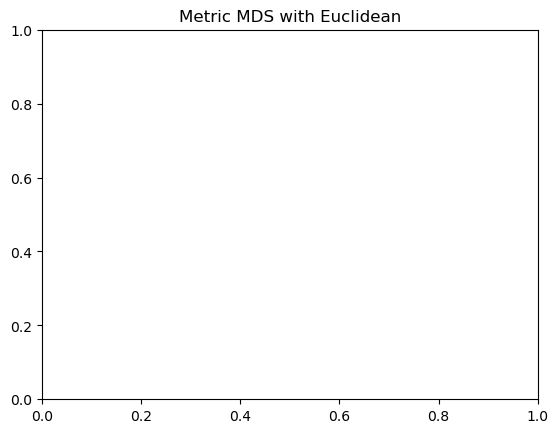

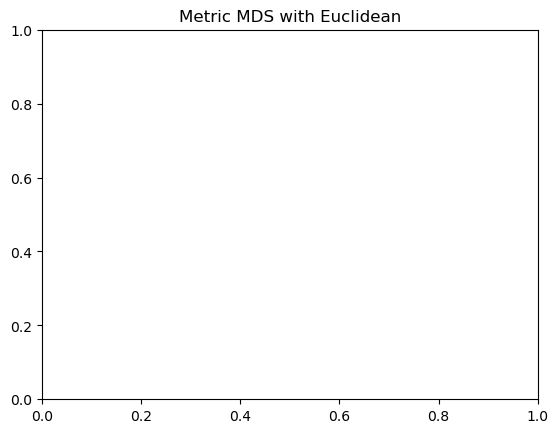

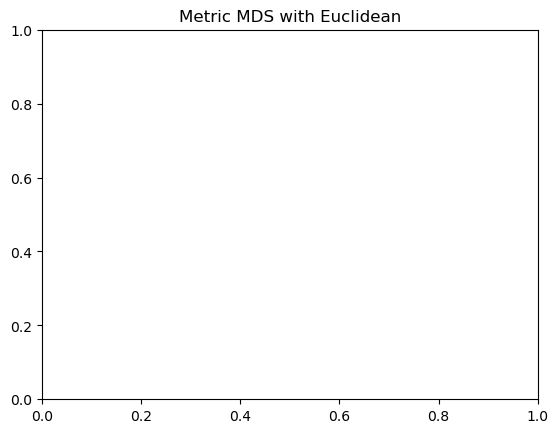

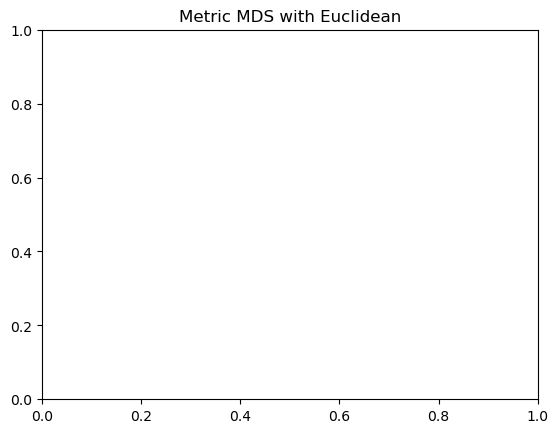

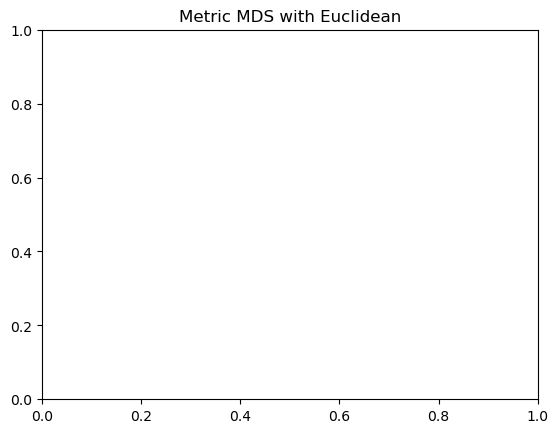

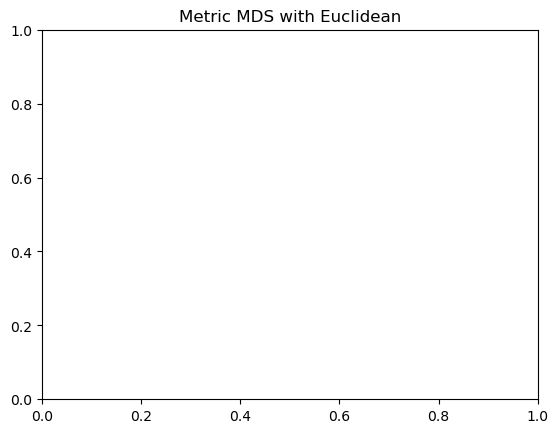

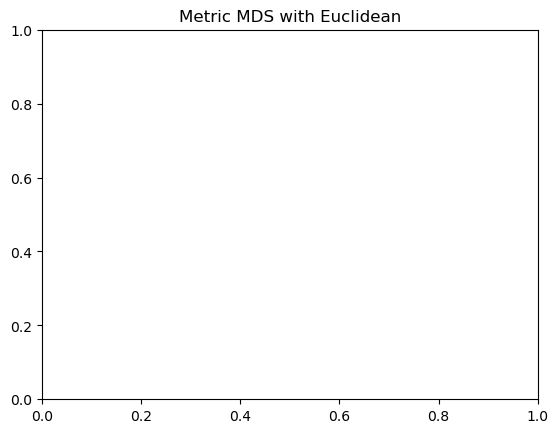

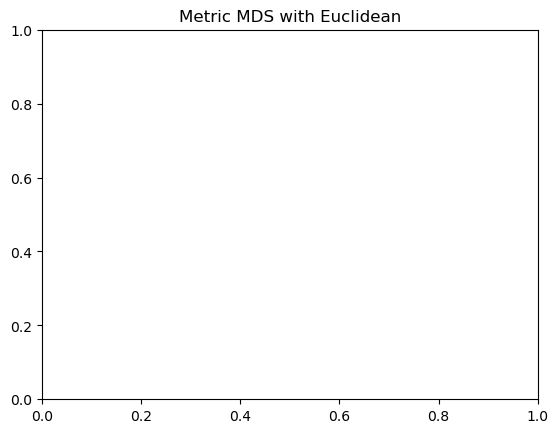

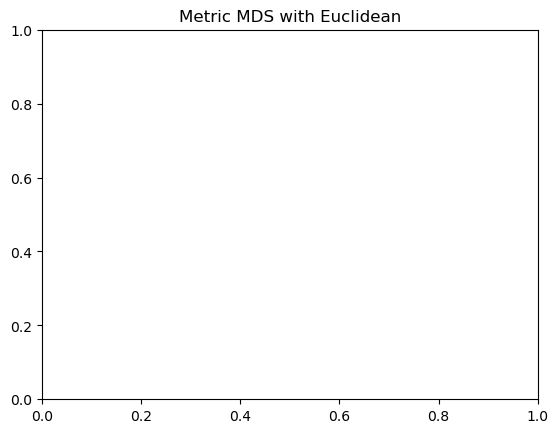

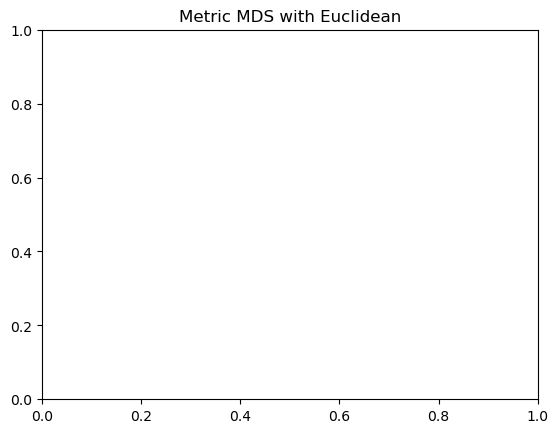

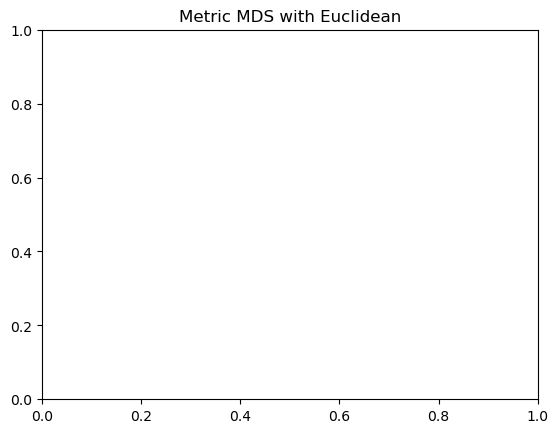

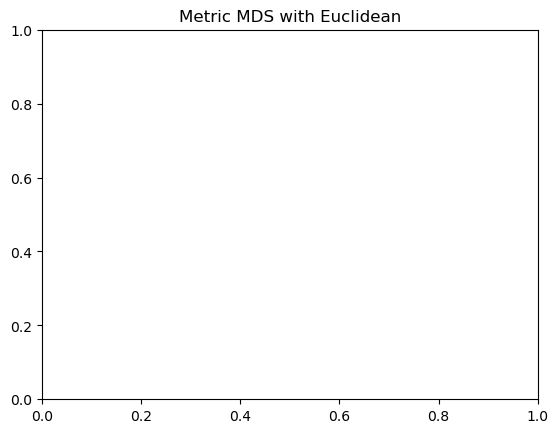

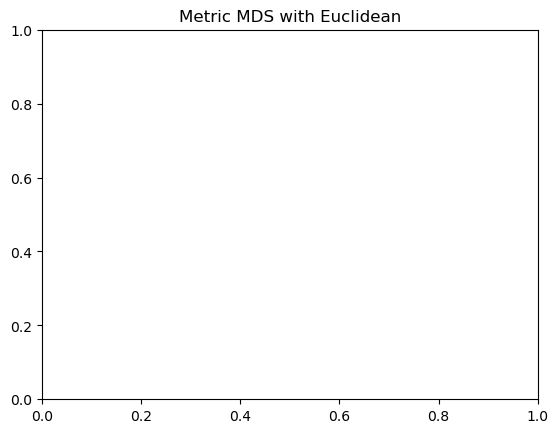

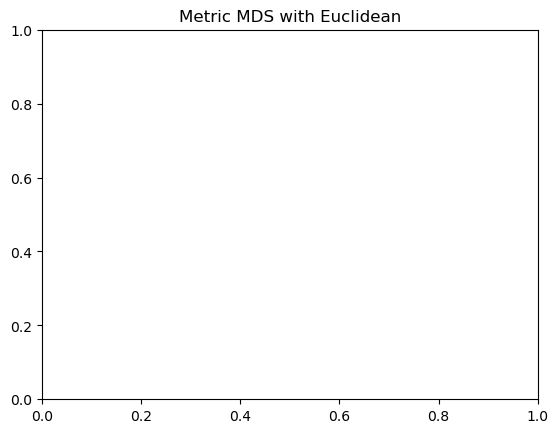

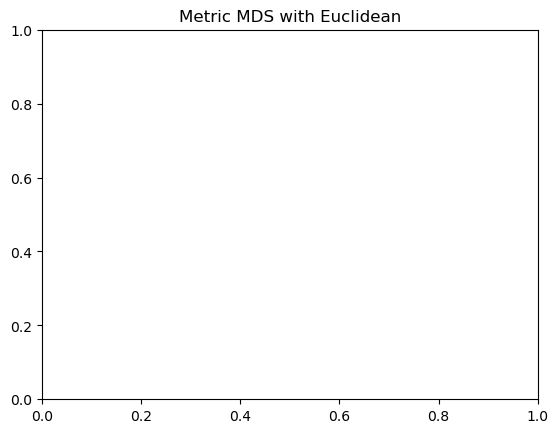

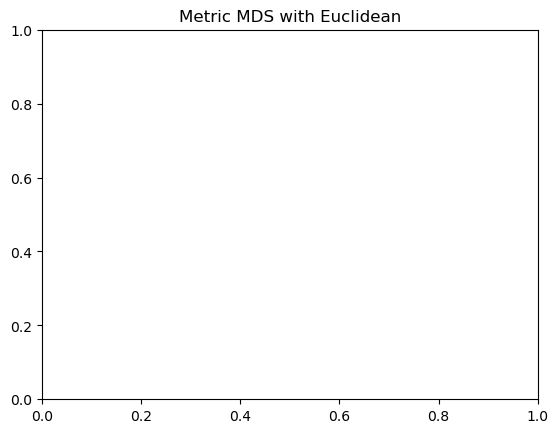

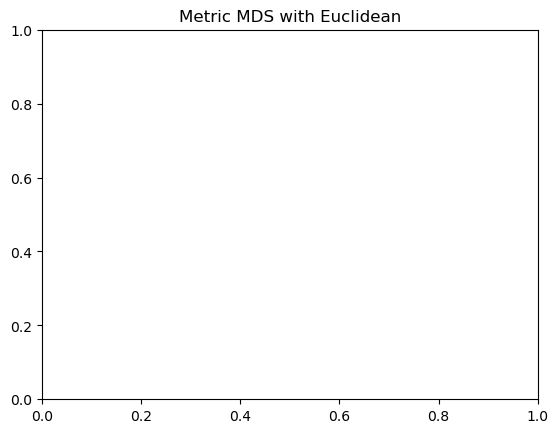

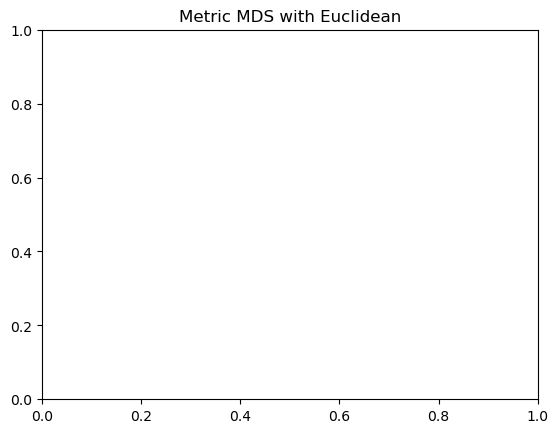

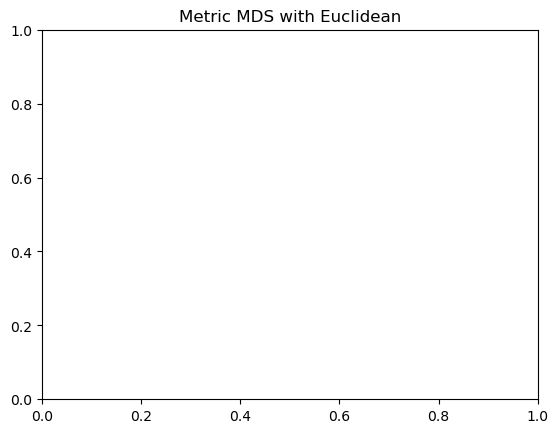

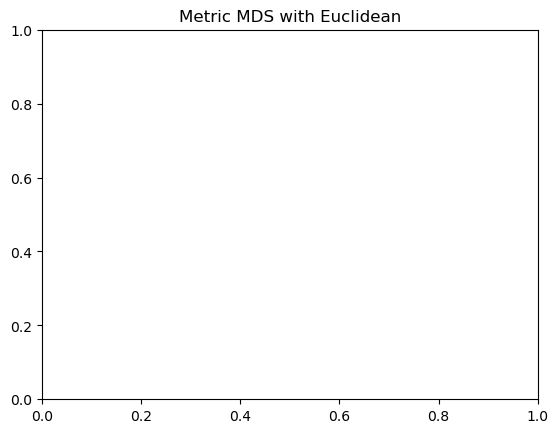

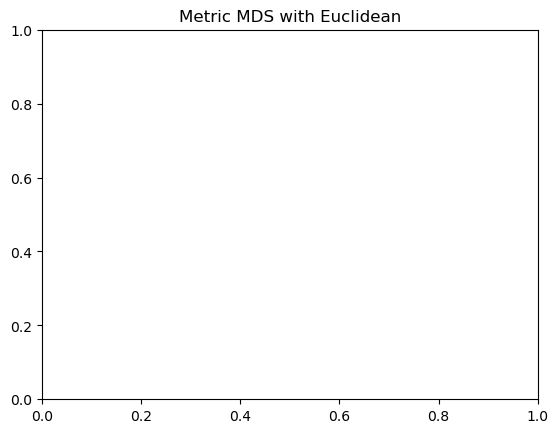

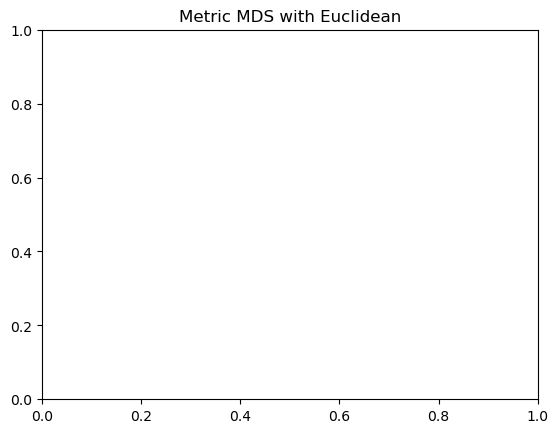

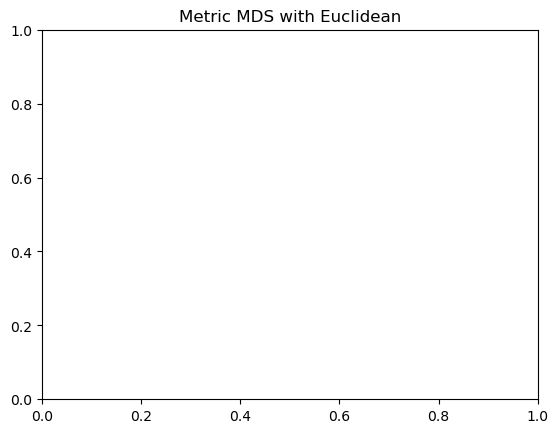

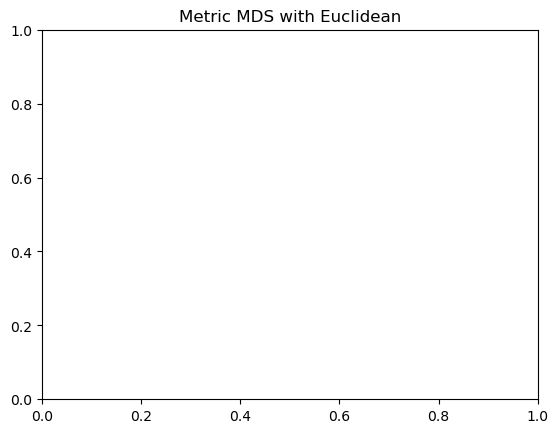

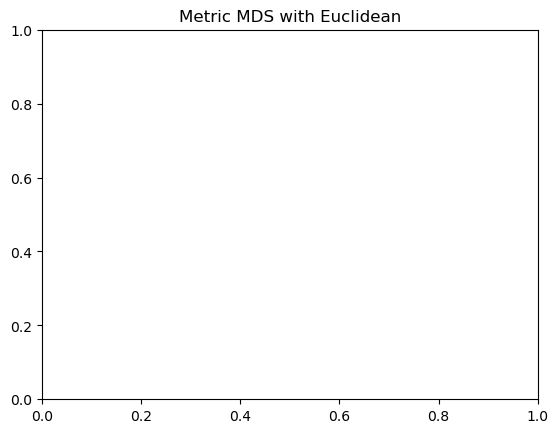

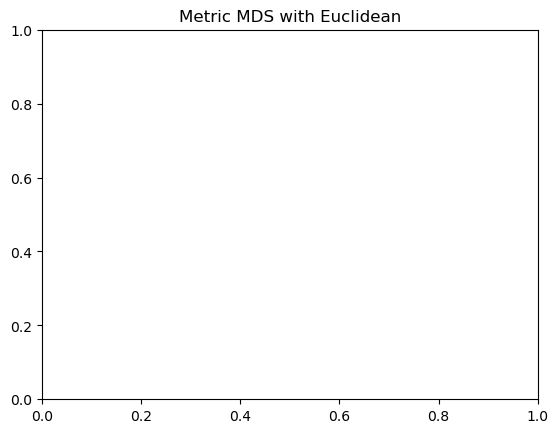

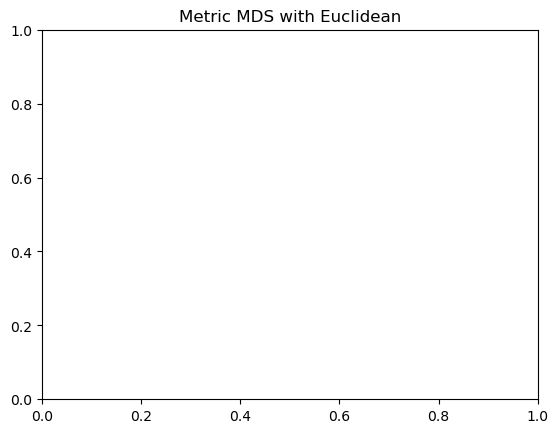

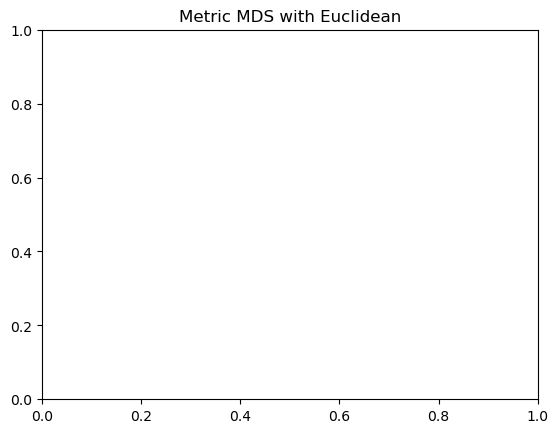

In [41]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True,'Metric MDS with Euclidean')

### Using the Manhattan Pairwise Distances

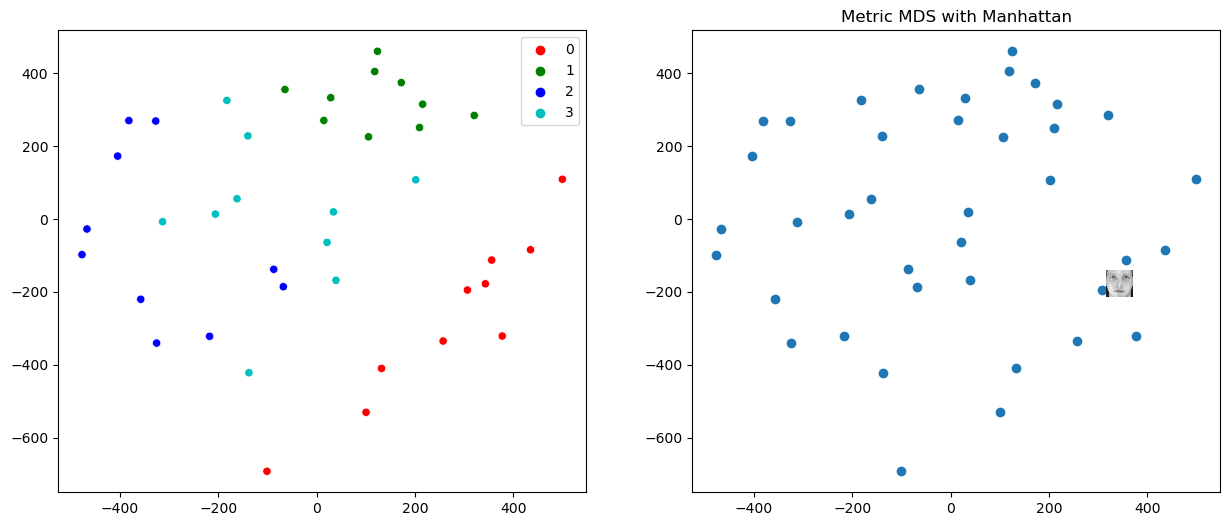

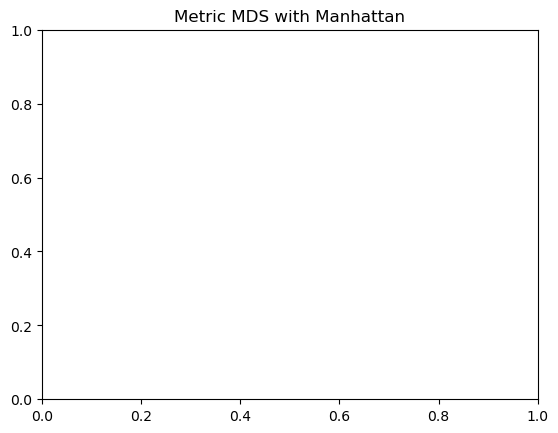

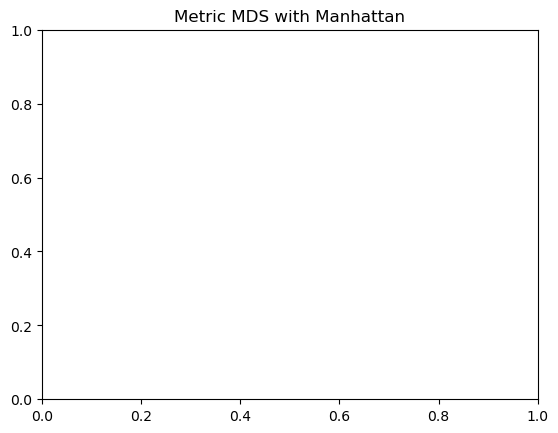

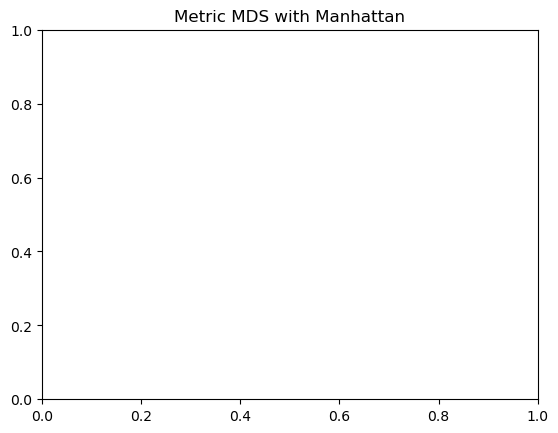

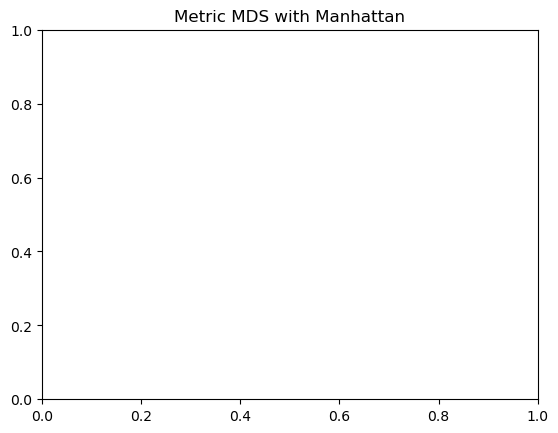

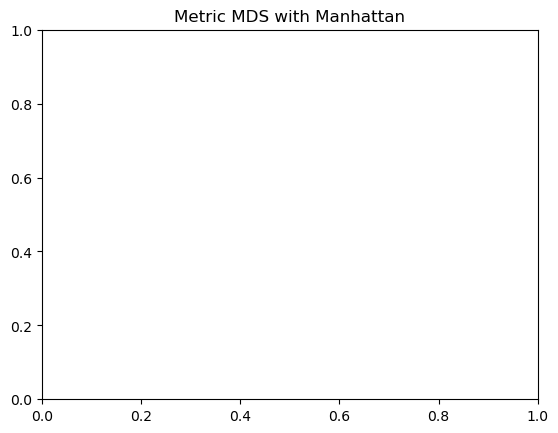

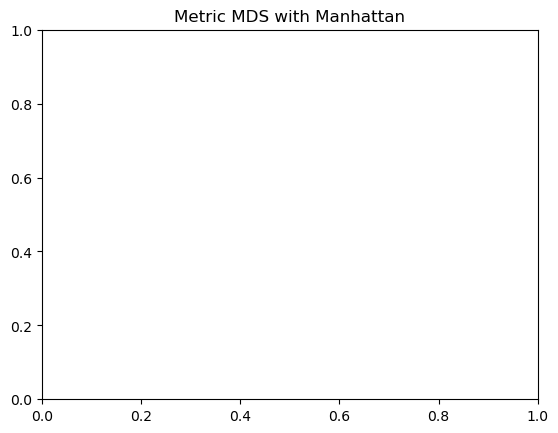

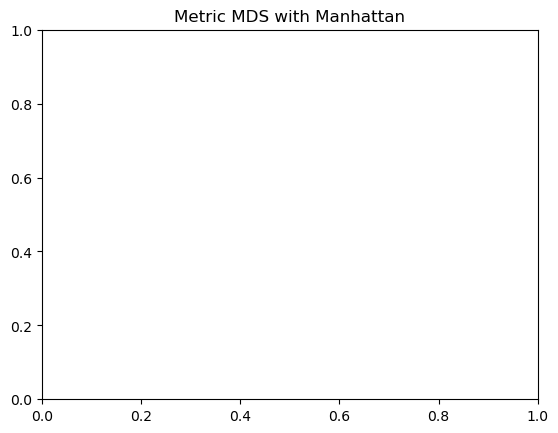

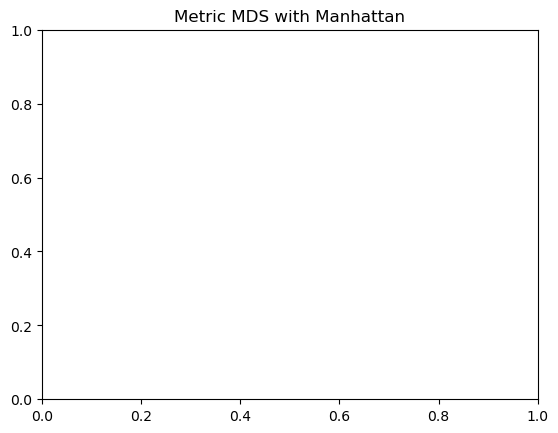

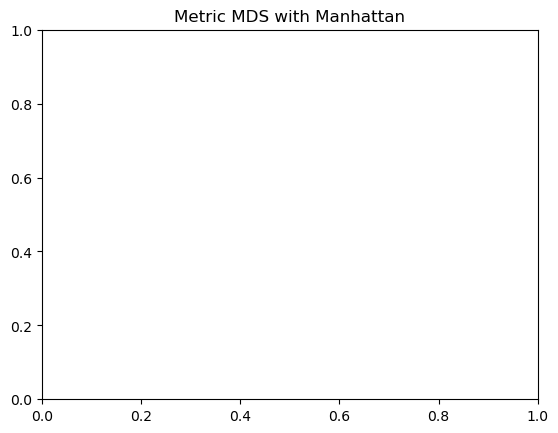

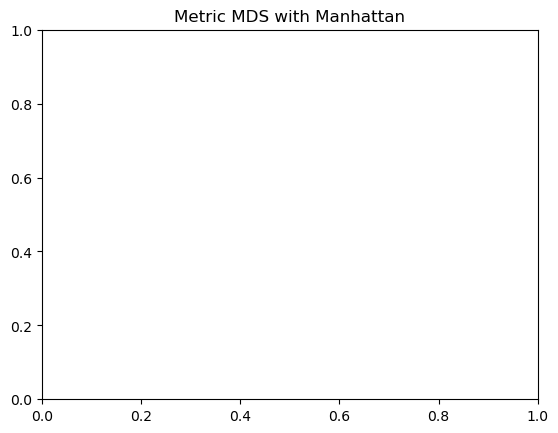

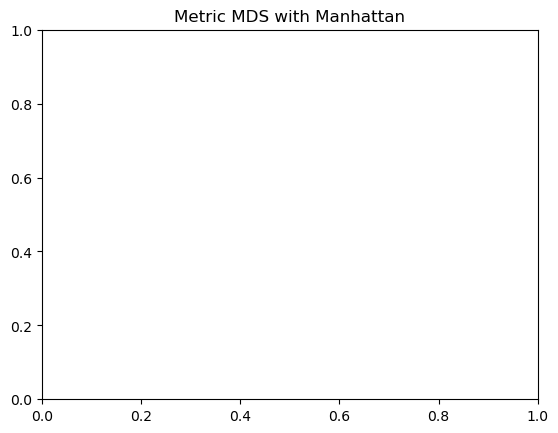

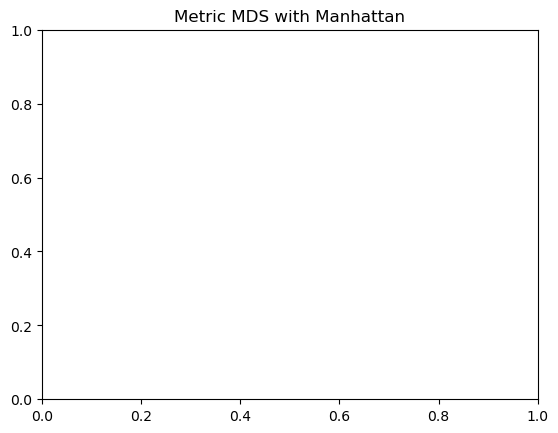

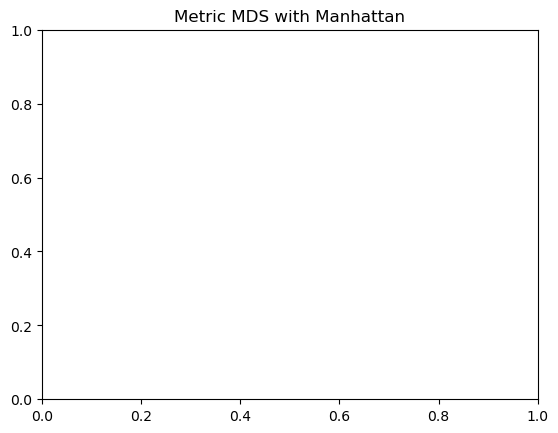

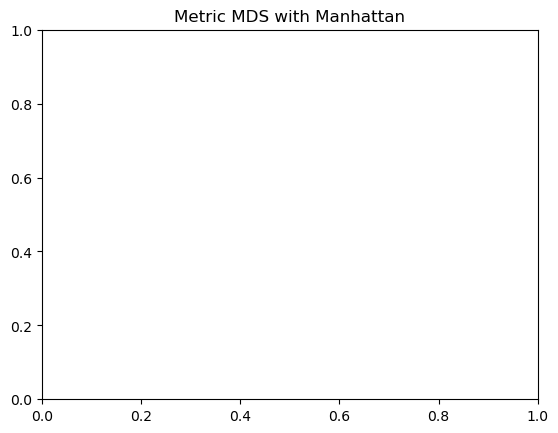

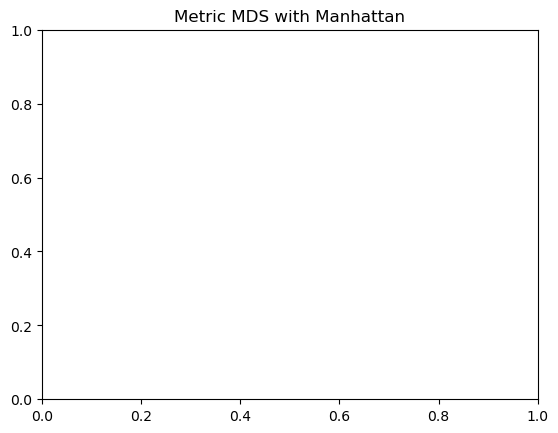

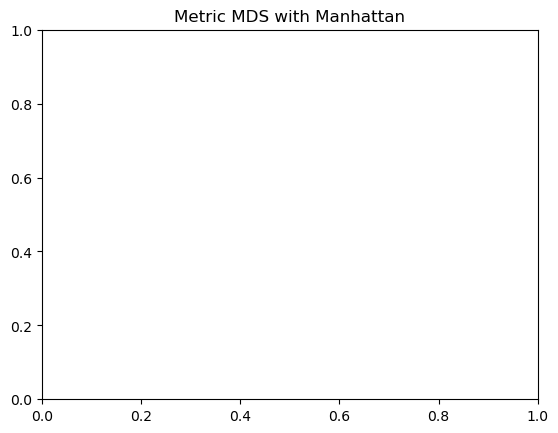

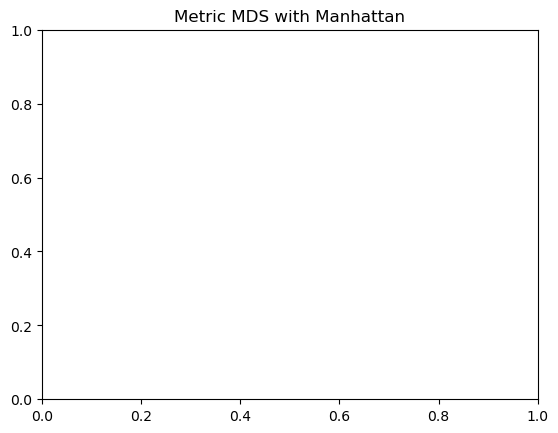

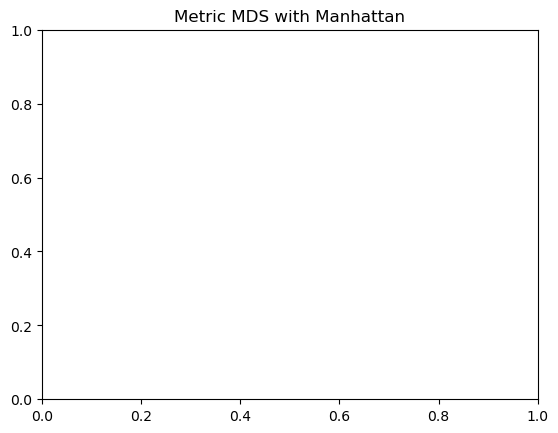

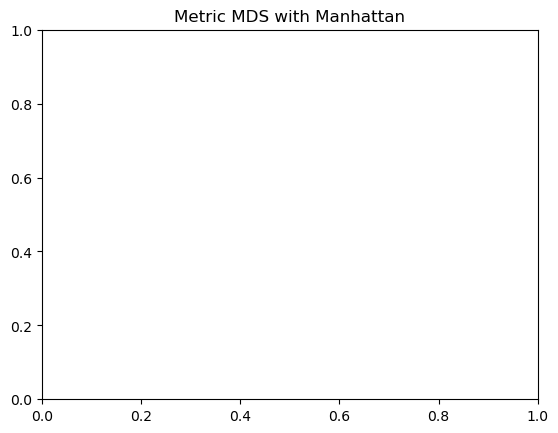

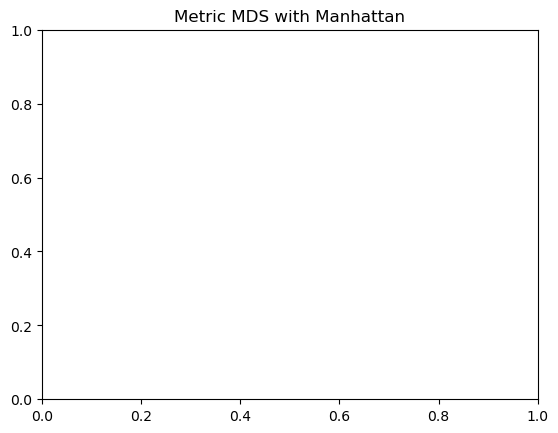

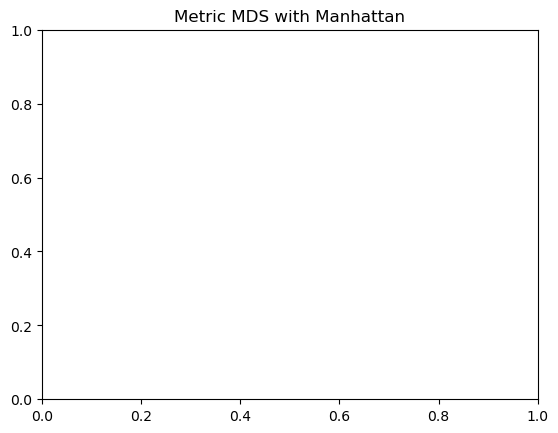

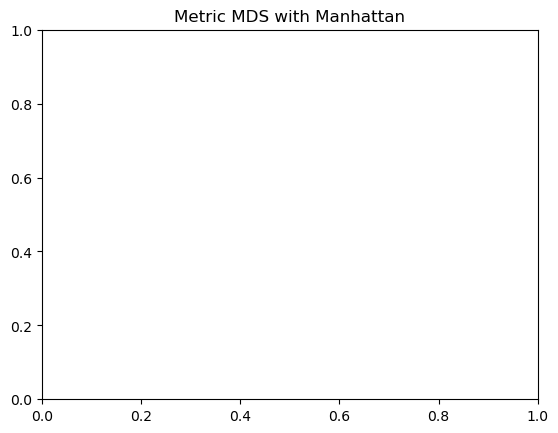

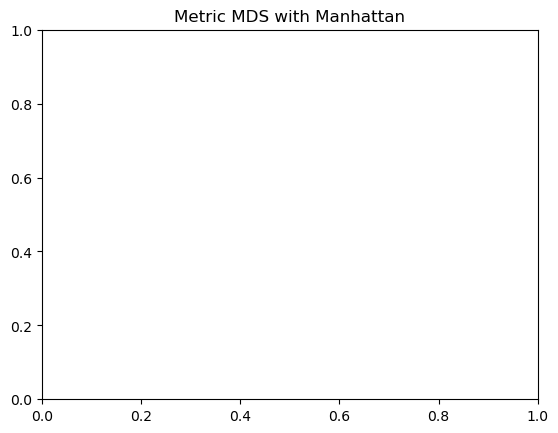

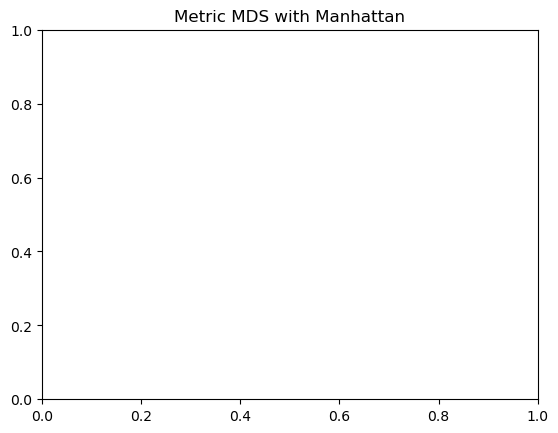

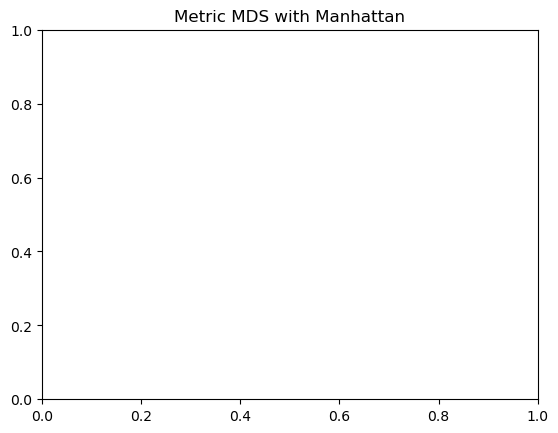

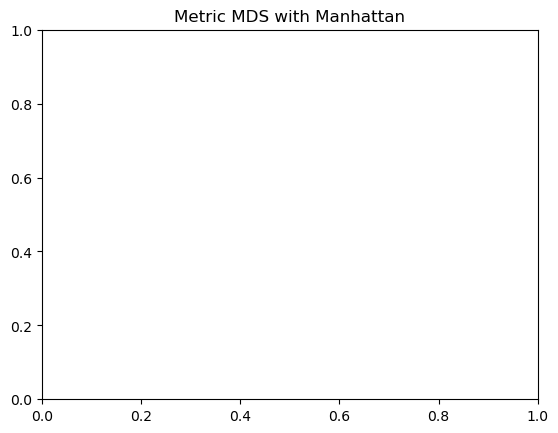

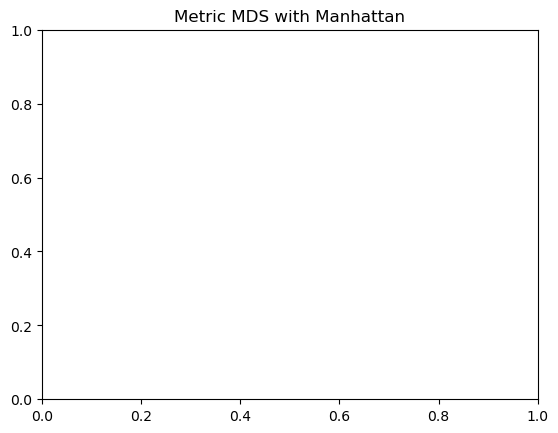

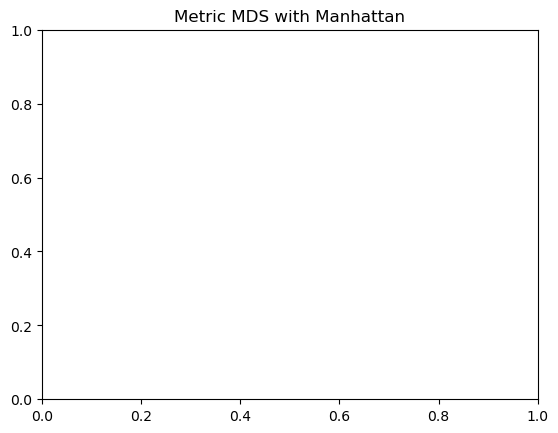

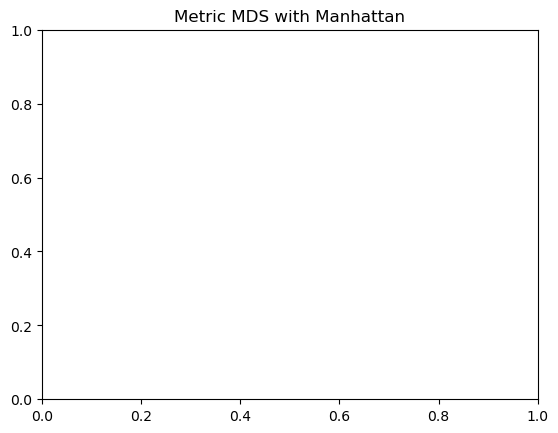

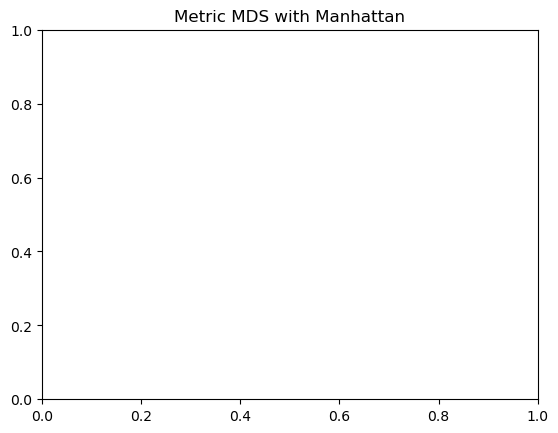

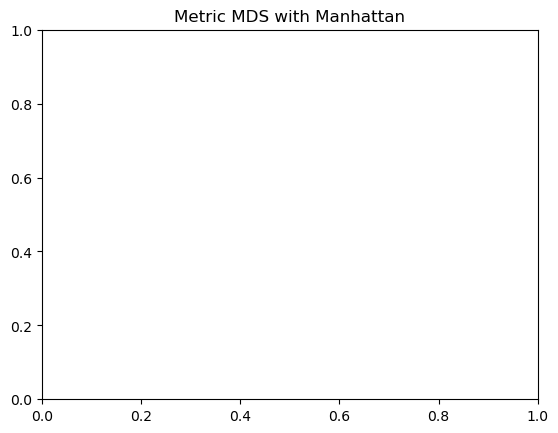

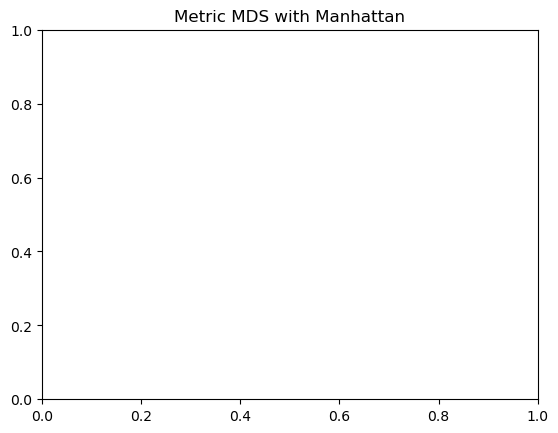

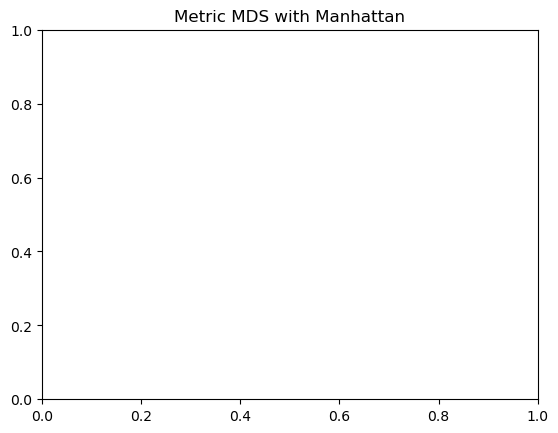

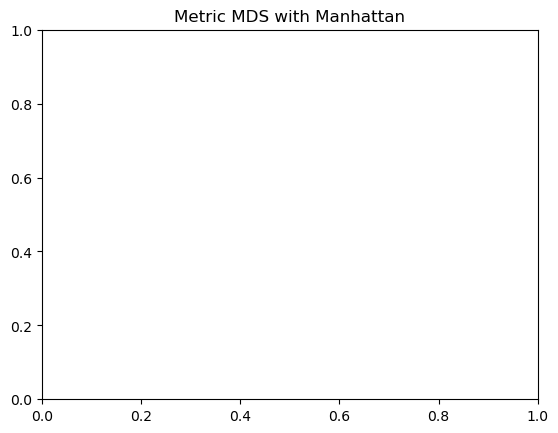

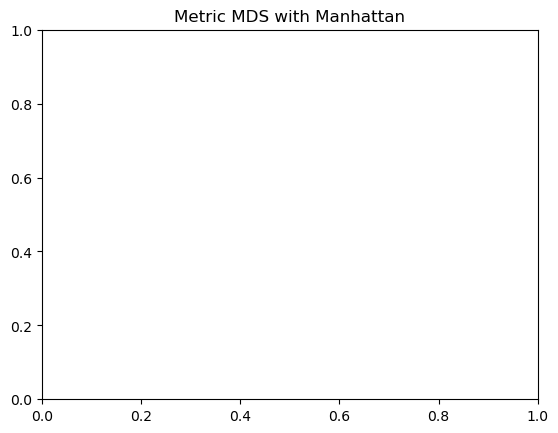

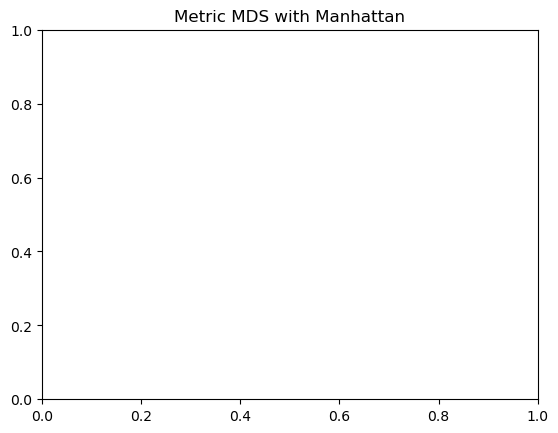

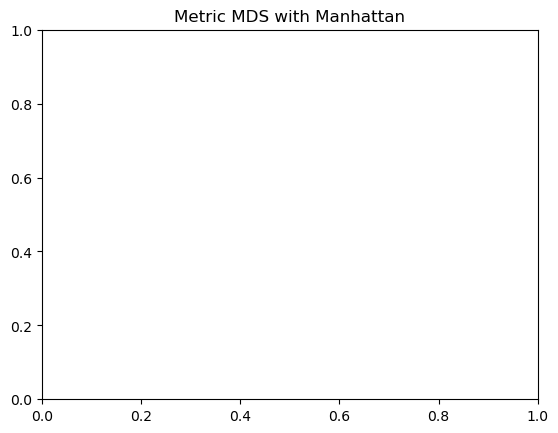

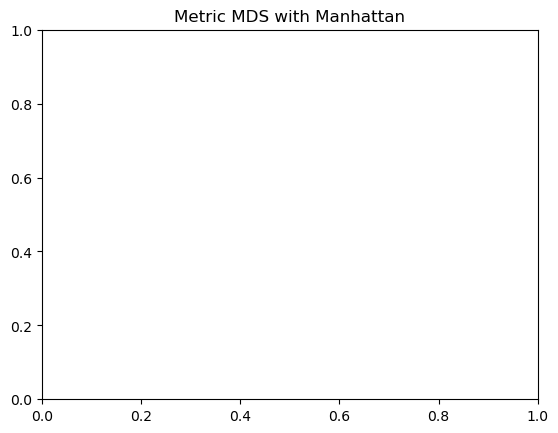

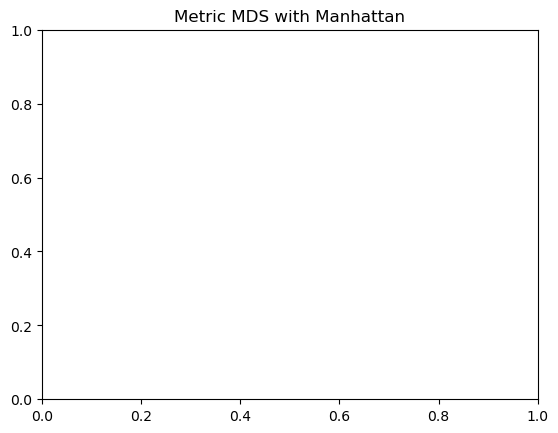

In [42]:
dist_L1 = manhattan_distances(X_faces)
mapData(dist_L1, X_faces, y_faces, True,'Metric MDS with Manhattan')

### Performing Non-Metric Multidimensional Scaling

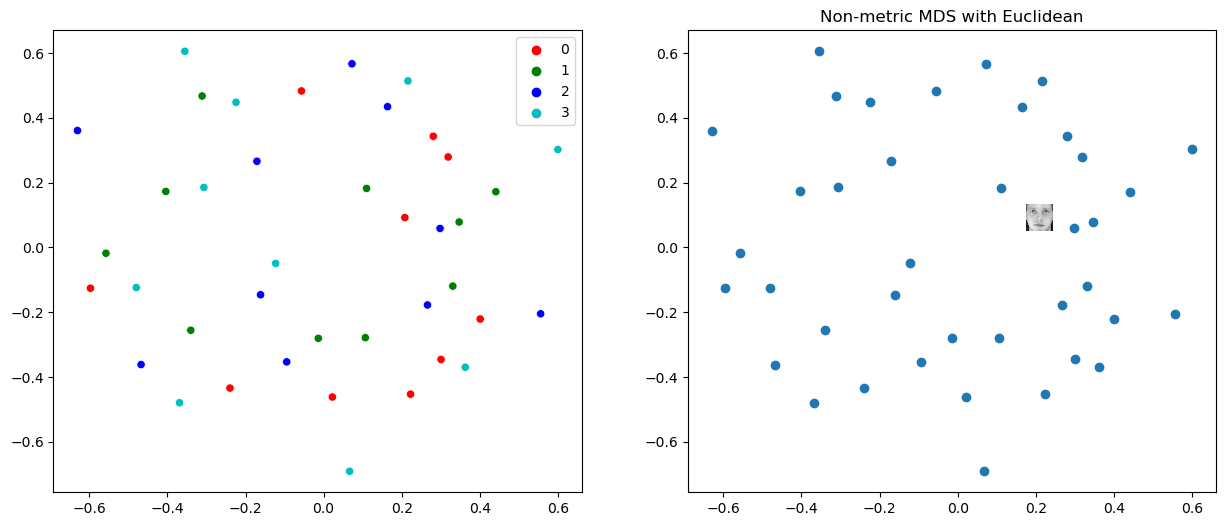

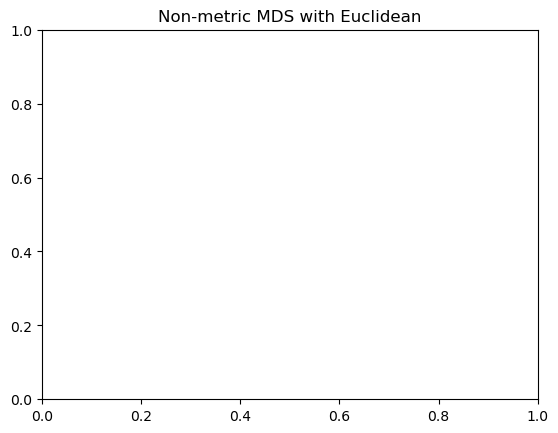

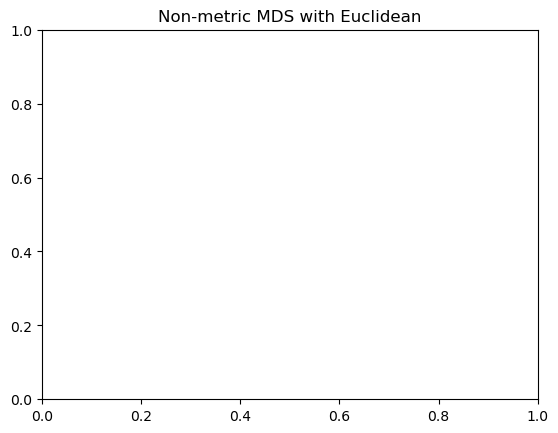

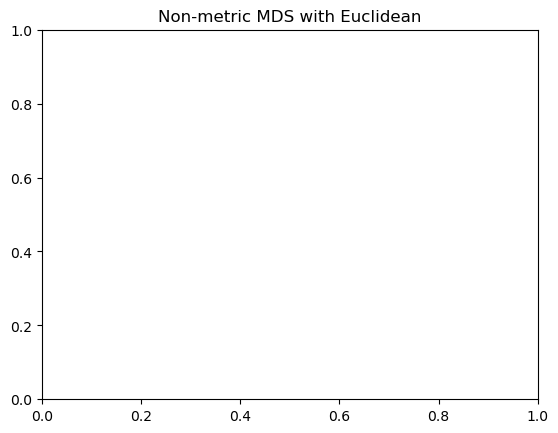

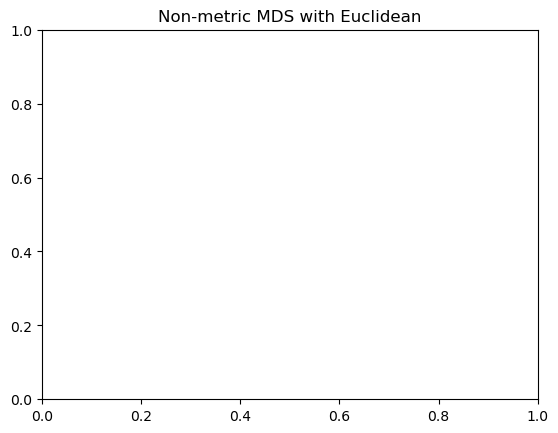

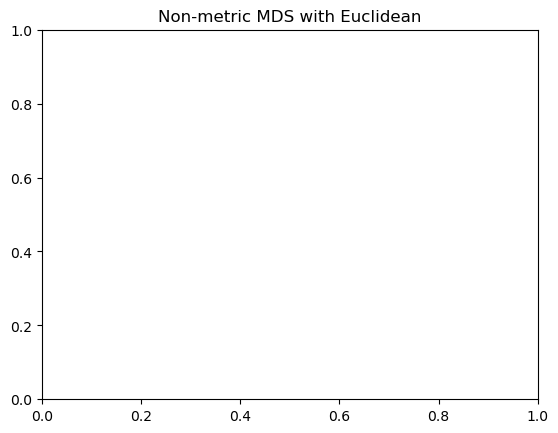

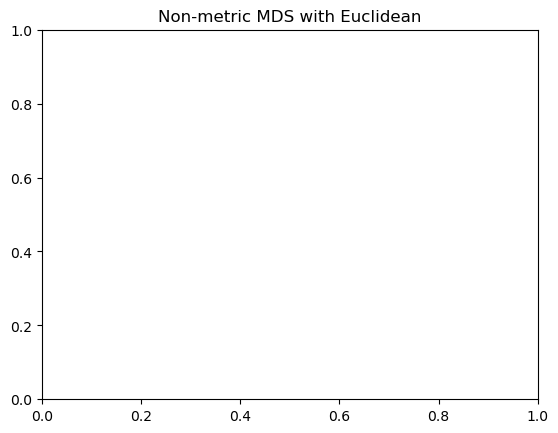

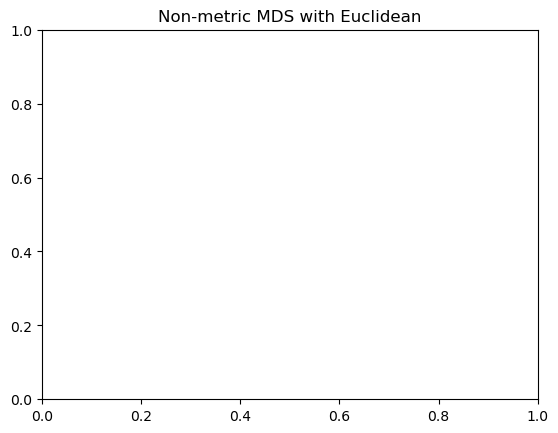

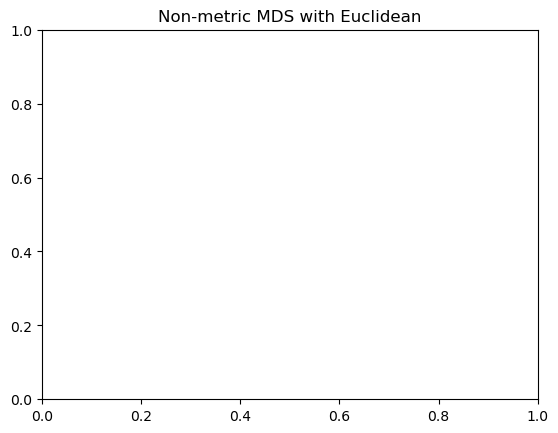

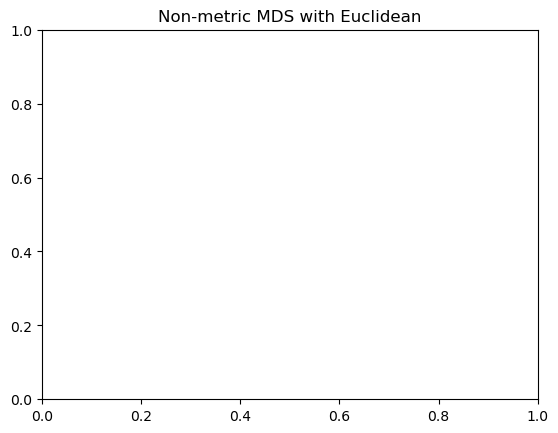

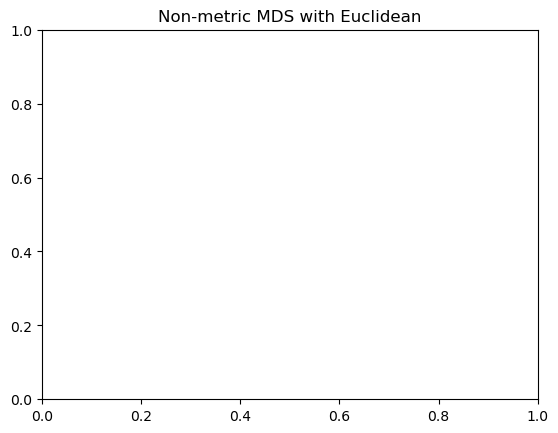

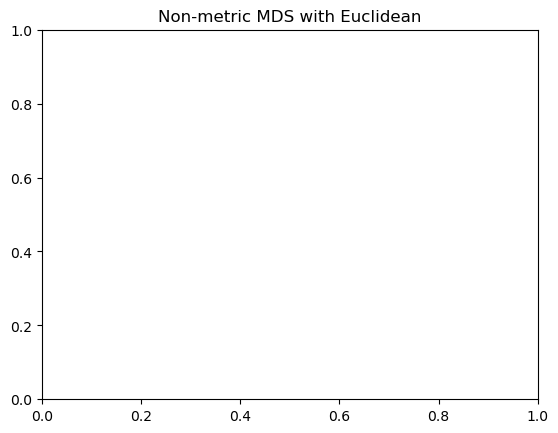

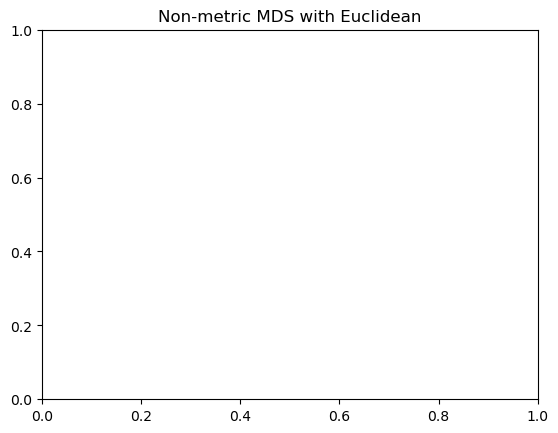

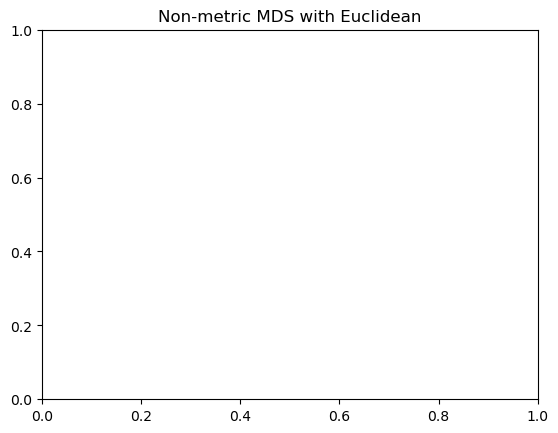

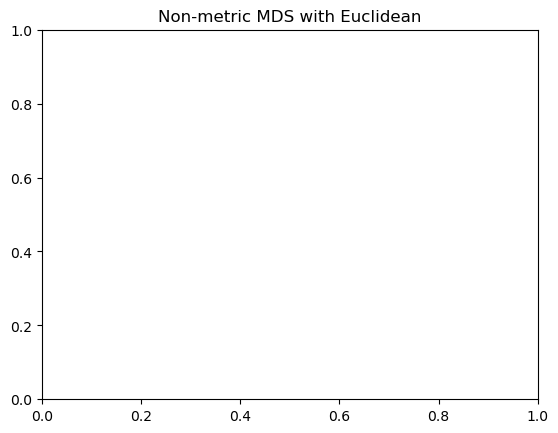

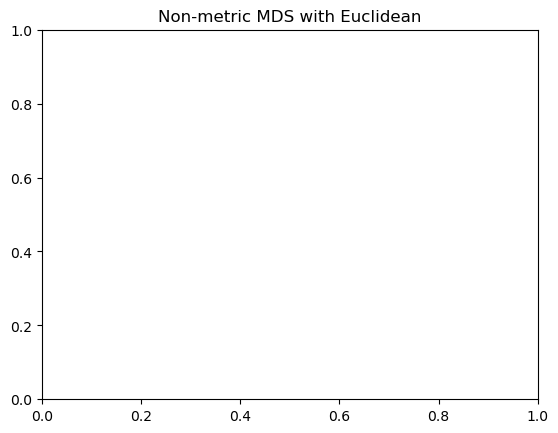

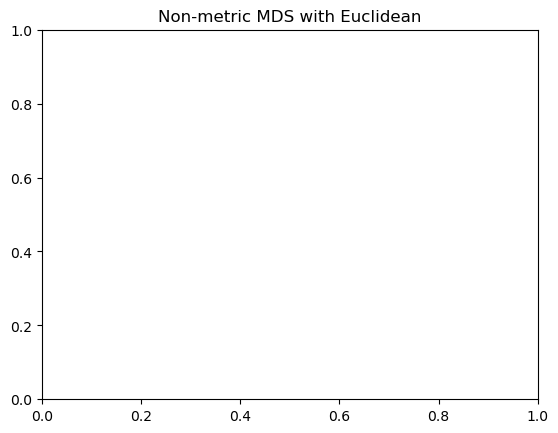

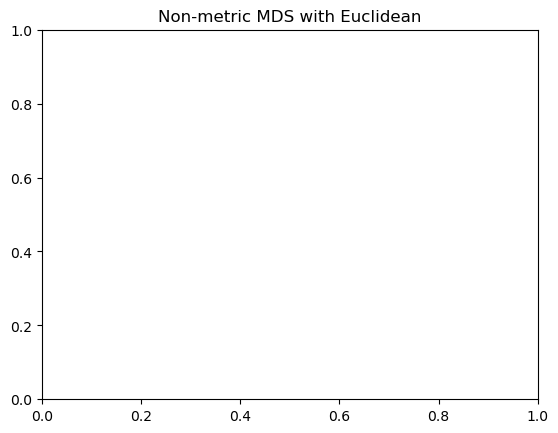

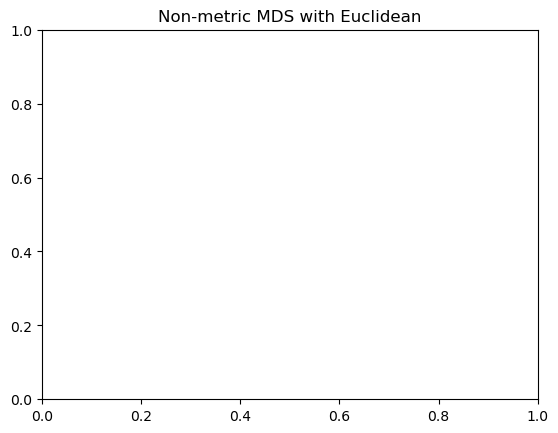

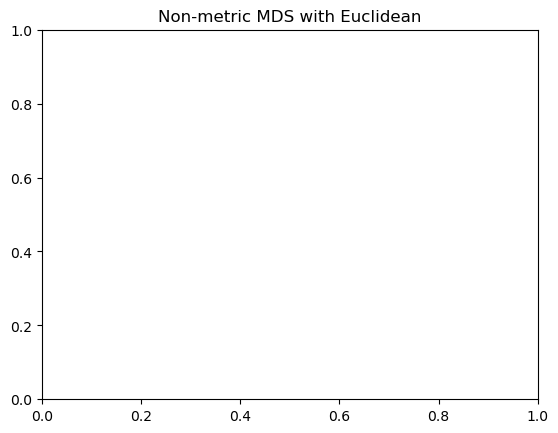

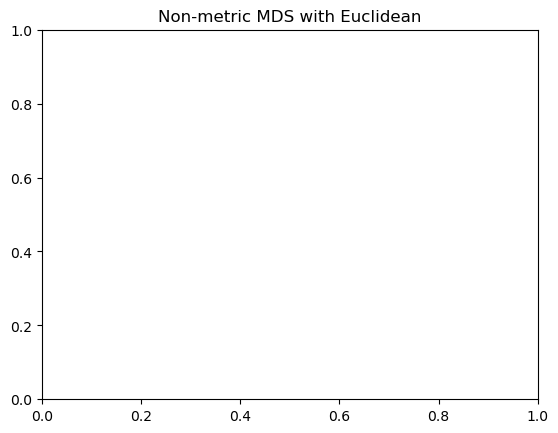

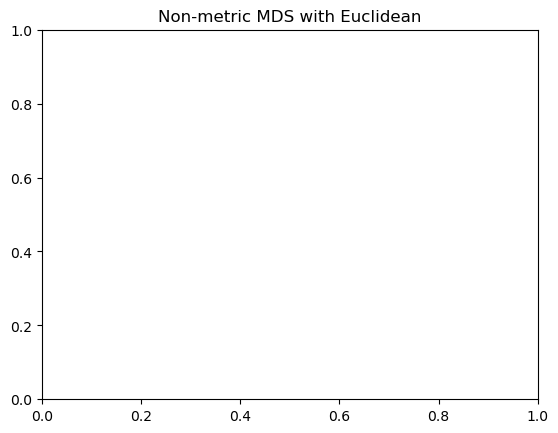

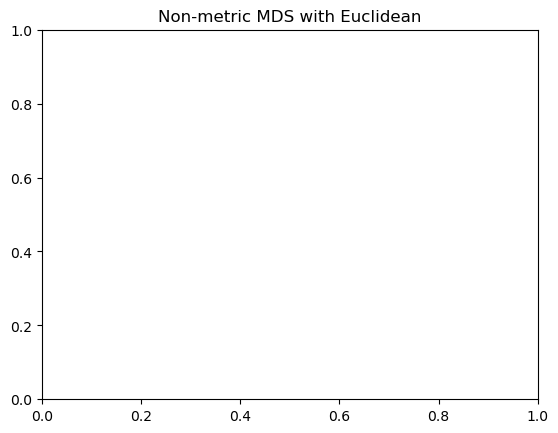

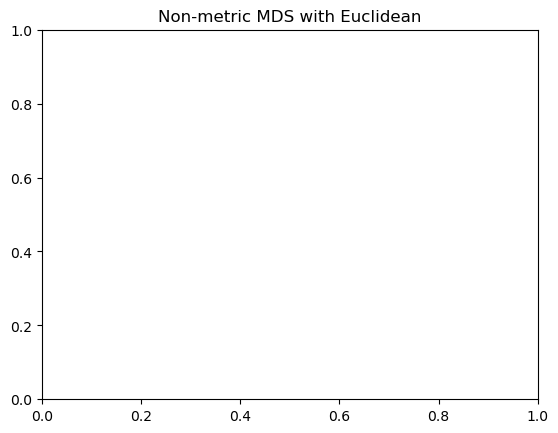

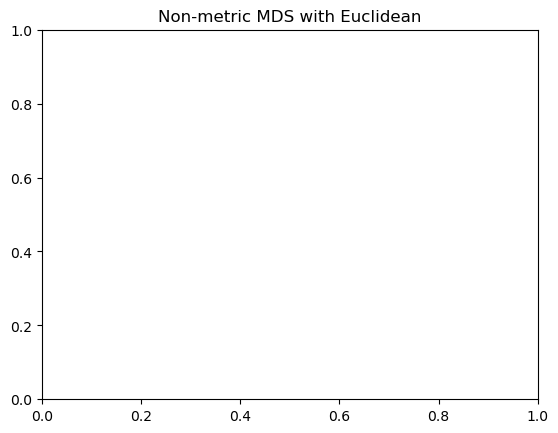

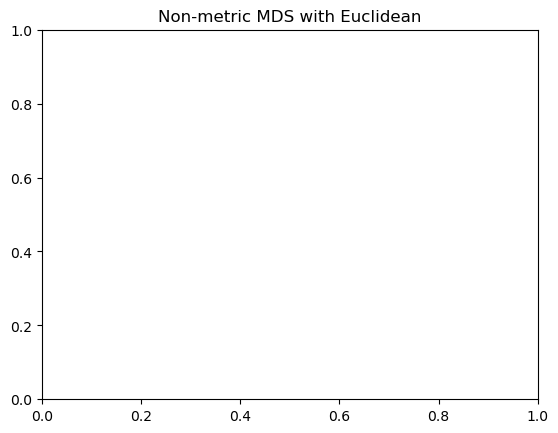

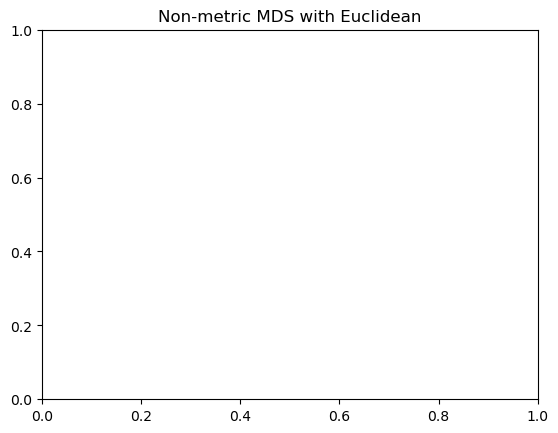

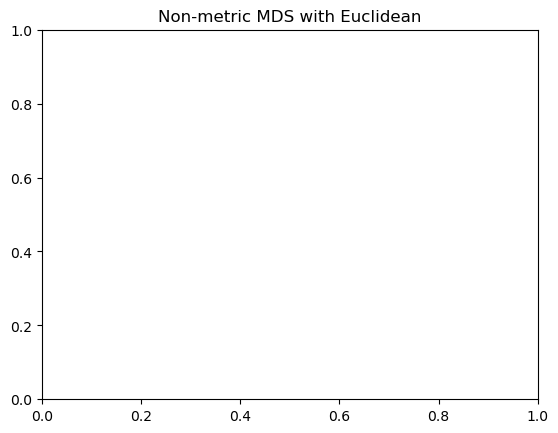

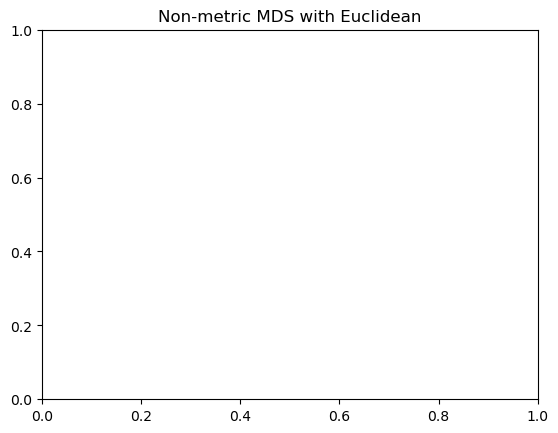

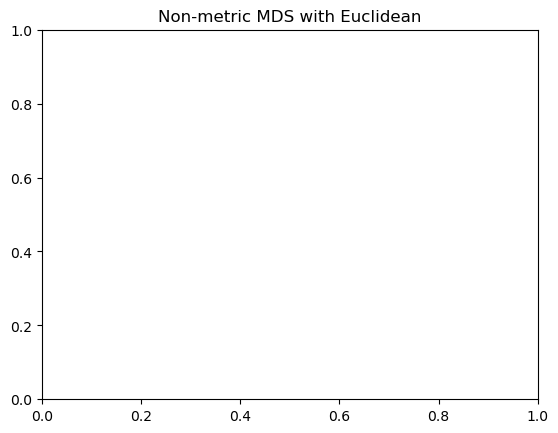

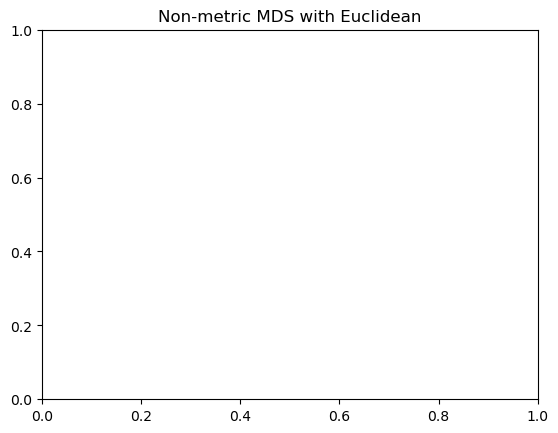

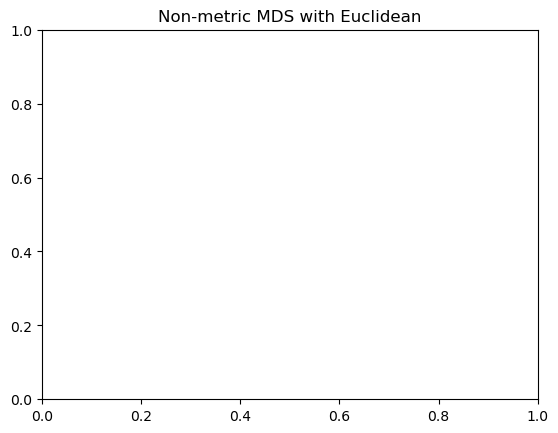

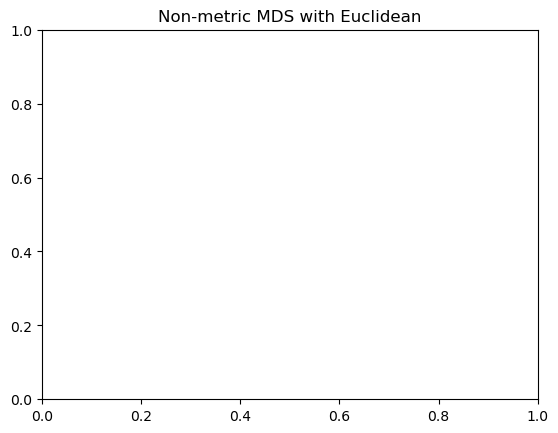

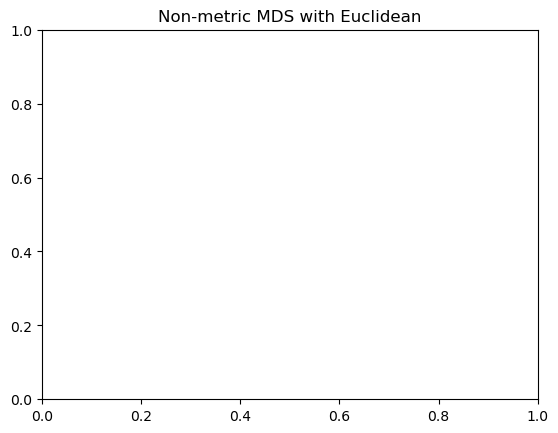

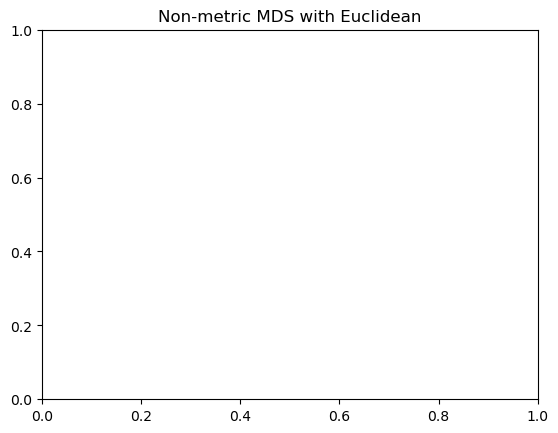

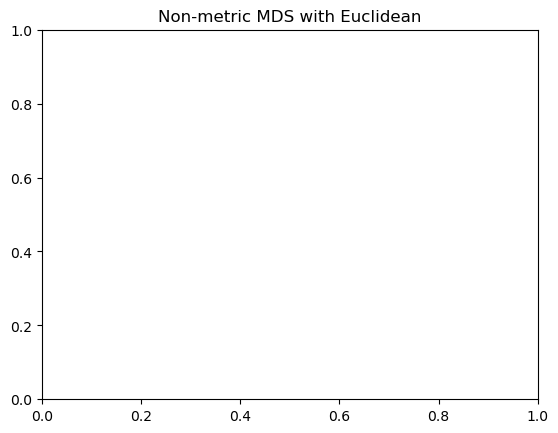

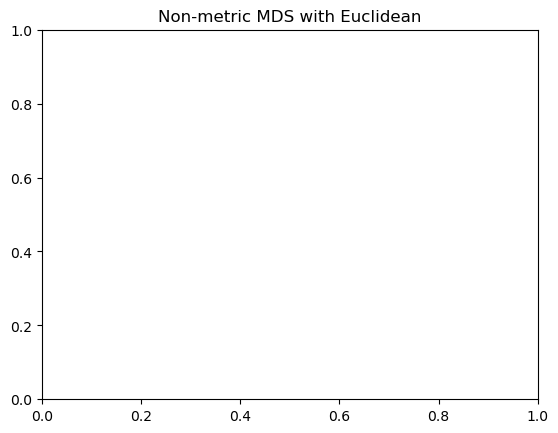

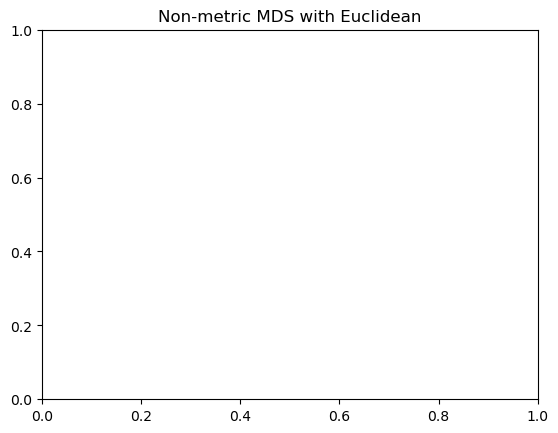

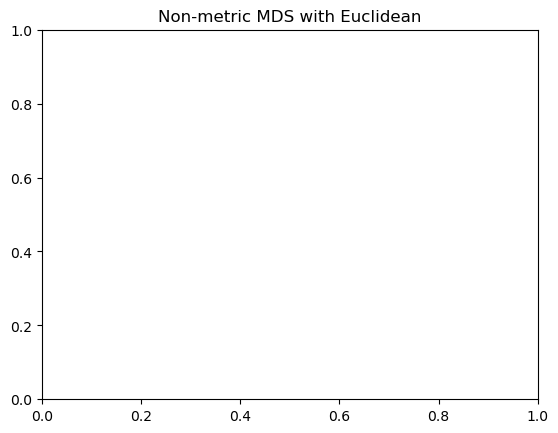

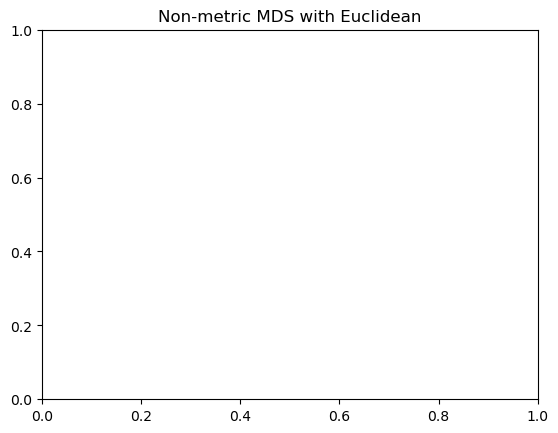

In [43]:
mapData(dist_euclid, X_faces, y_faces, False,
 'Non-metric MDS with Euclidean')

### The n_components Parameter in MDS

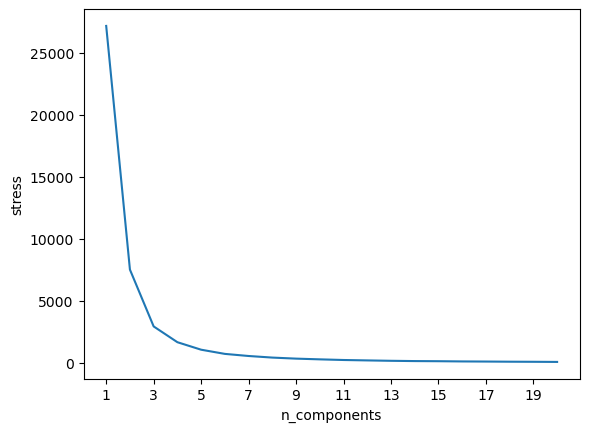

In [47]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
 # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
     # Apply MDS
    pts = mds.fit_transform(dist_euclid)
     # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()